# Import libraries and modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

import random
random.seed(2023)

from matplotlib.font_manager import FontProperties

import os
from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(2022)

Mounted at /content/gdrive


# Constants

In [ ]:
GENDERS = ["female", "male"]

DATA_DIR = f"/content/gdrive/MyDrive/BodyMeasurementsDB"

MEASUREMENTS = ['weight_kg',
                'stature_cm',
                'neck_base_girth',
                'chest_girth',
                'waist_girth',
                'hips_buttock_girth',
                'shoulder_girth',
                'thigh_girth',
                'thigh_low_girth',
                'calf_girth',
                'ankle_girth',
                'forearm_girth',
                'wrist_girth',
                'shoulder_length',
                'sleeveoutseam_length',
                'forearm_length',
                'crotchheight_length',
                'waistback_length',
                'thigh_length',
                'chest_depth_length',
                'head_girth']

SOHA_MEAS = [ 'weight_kg',
              'stature_cm',
              'shoulder_girth',
              'chest_girth',
              'waist_girth',
              'hips_buttock_girth',
              'thigh_girth',
              'crotchheight_length',
              'sleeveoutseam_length',
              'waistback_length',
            ]

SOHA_MEAS_LABELS = [ 'Weight',
                     'Stature',
                     'Shoulder girth',
                     'Chest girth',
                     'Waist girth',
                     'Buttock girth',
                     'Thigh girth',
                     'Crotch height',
                     'Sleeve outseam',
                     'Waistback length',
                   ]


## Load dataframe
file_encoding = "ISO-8859-1"    # 'utf8'

# plt.style.use("ggplot")
# plt.style.use("seaborn-paper")
# plt.style.use("default")
plt.style.use("seaborn-colorblind")

<ipython-input-2-0a6d2f547c15>:58: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


# Functions

In [ ]:
# define a function that modifies each element by a random factor
def modify_by_random_factor(x):
    # generate a random factor
    factor = np.random.uniform(-5, 5)
    # factor = np.random.standard_normal()
    print(factor)
    # modify the value by the random factor
    return x + factor

# Load data

ANSUR II DB

In [ ]:
db_dir = f"{DATA_DIR}/ANSURII_female.csv"
df_ansurii_female = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})

db_dir = f"{DATA_DIR}/ANSURII_male.csv"
df_ansurii_male = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})

ANSUR II Avatars DB

In [ ]:
db_dir = f"{DATA_DIR}/ANSURII_female_avatars.csv"
df_ansurii_female_ava = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})

db_dir = f"{DATA_DIR}/ANSURII_male_avatars.csv"
df_ansurii_male_ava = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})

# # apply the function to each element in the dataframe
# df_ansurii_female_ava = df_ansurii_female_ava.apply(modify_by_random_factor)
# df_ansurii_male_ava = df_ansurii_male_ava.apply(modify_by_random_factor)

ANSUR II Avatars DB - 2023 (obtained with perfit2023 code)

In [ ]:
db_dir = f"{DATA_DIR}/ANSURII2023_female_avatars.csv"
df_ansurii2023_female_ava = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})

db_dir = f"{DATA_DIR}/ANSURII2023_male_avatars.csv"
df_ansurii2023_male_ava = pd.read_csv(db_dir, encoding = file_encoding, converters={'ID': str})

# Calculate relative percentage error (to dataframes)

In [ ]:
df_ansurii_female.shape

(1986, 21)

In [ ]:
df_error_female = pd.DataFrame()
df_error_male = pd.DataFrame()

df_error2023_female = pd.DataFrame()
df_error2023_male = pd.DataFrame()

for gender in GENDERS:

    df1 = eval(f'df_ansurii_{gender}')
    df2 = eval(f'df_ansurii_{gender}_ava')
    df3 = eval(f'df_ansurii2023_{gender}_ava')

    # num_rows = eval(f'df_ansurii_{gender}.shape[0]')
    num_rows = df1.shape[0]

    for col in df1.columns:

        error1 = np.empty(num_rows, dtype=float)
        error2 = np.empty(num_rows, dtype=float)
        # iterate over the rows in the dataframe
        for index, row in df1.iterrows():

            e1 = abs((row[col] - df2[col][index]) / row[col]) * 100
            error1[index] = round(e1, 1)

            e2 = abs((row[col] - df3[col][index]) / row[col]) * 100
            error2[index] = round(e2, 1)


        if gender == 'female':
            df_error_female[col] = error1
            df_error2023_female[col] = error2
        else:
            df_error_male[col] = error1
            df_error2023_male[col] = error2

# Plots for paper

## Violin plots

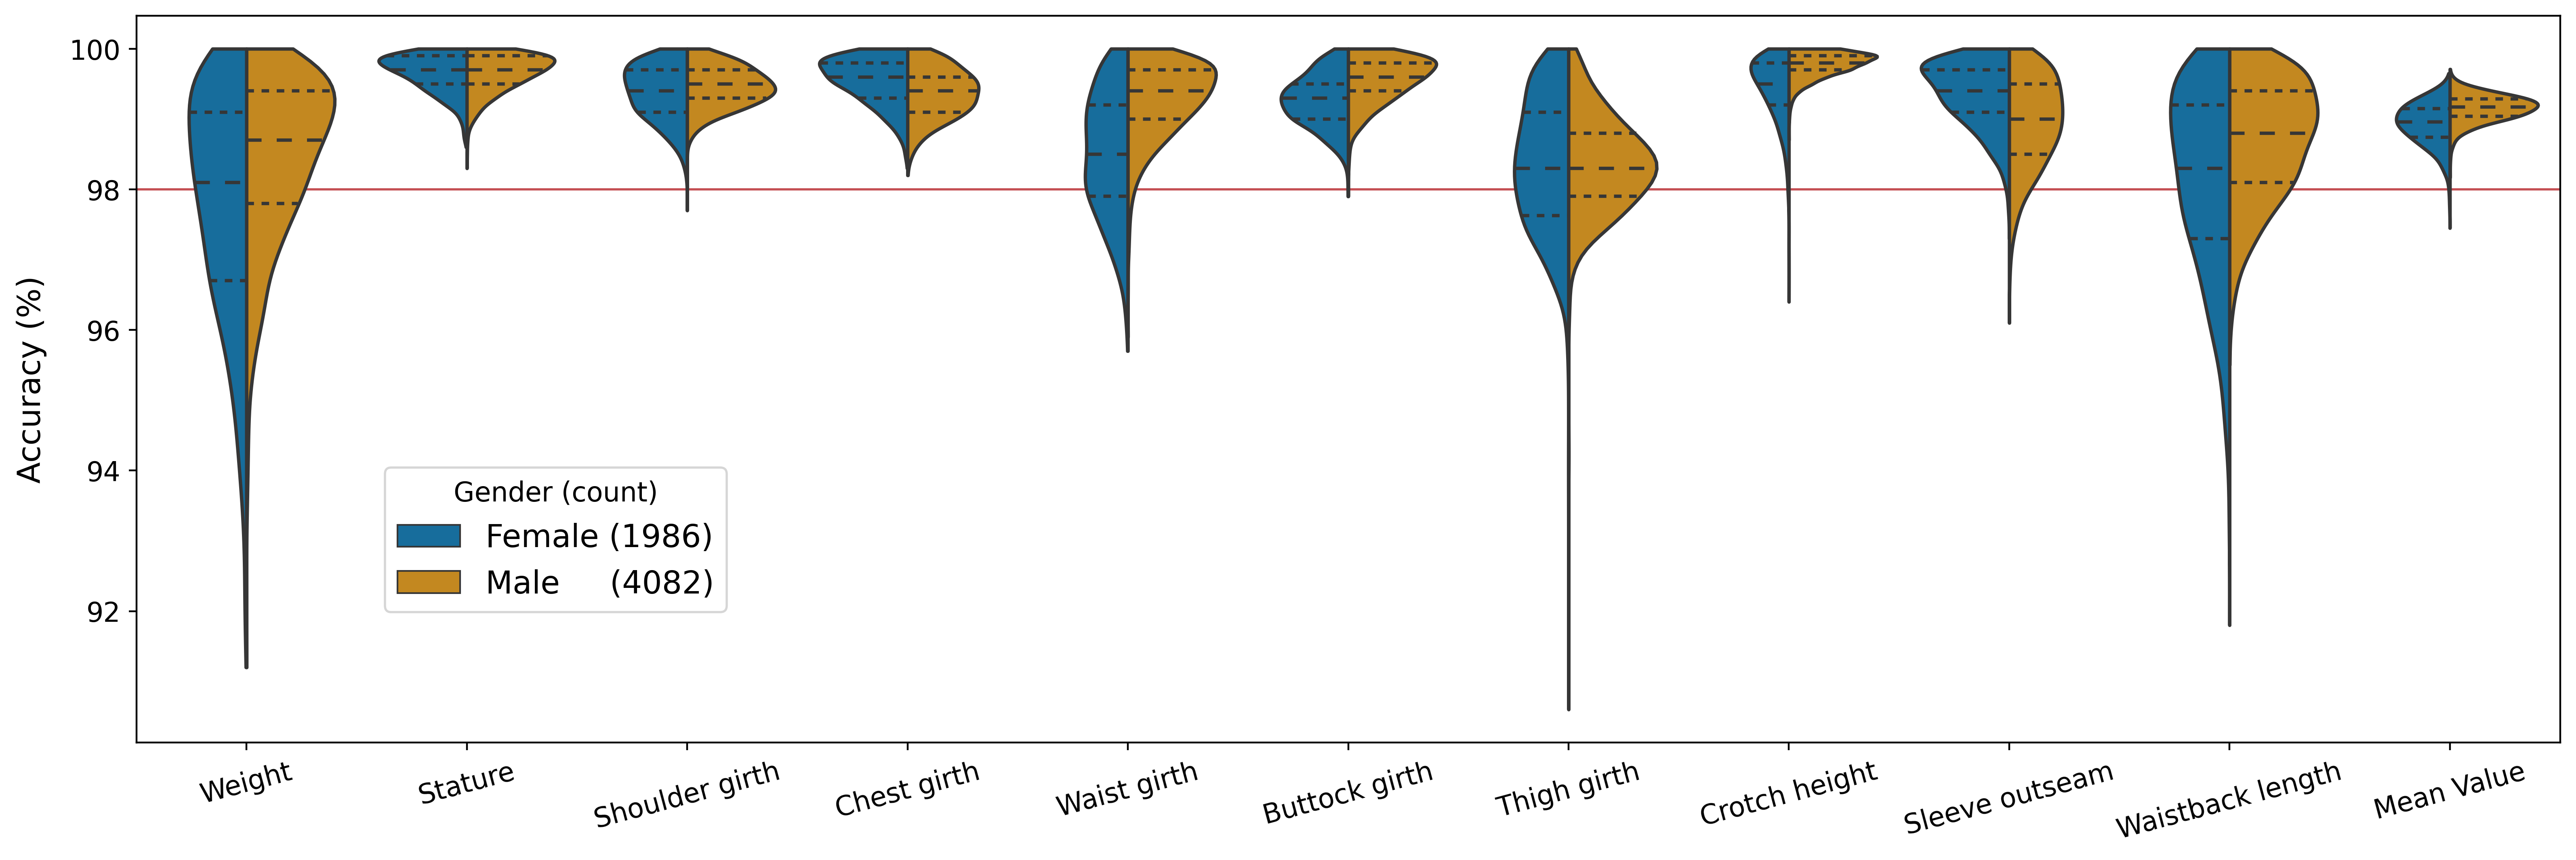

In [ ]:
threshold = 98.0  # set the threshold value


sns.set(font_scale=1.0)

plt.style.use("default")

fig, ax = plt.subplots(figsize=(20,6), dpi=400)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

df_soha_fem = df_error2023_female[SOHA_MEAS].apply(lambda x: 100 - x)
df_soha_fem.columns = SOHA_MEAS_LABELS
fem_tot = len(df_soha_fem)
df_soha_fem['gender'] = f'Female ({fem_tot})'
df_soha_mal = df_error2023_male[SOHA_MEAS].apply(lambda x: 100 - x)
df_soha_mal.columns = SOHA_MEAS_LABELS
mal_tot = len(df_soha_mal)
df_soha_mal['gender'] = f'Male     ({mal_tot})'

df_soha = pd.concat([df_soha_fem, df_soha_mal])
df_soha ['Mean Value'] = df_soha .iloc[:, :-1].mean(axis=1)  # all columns but gender

df_soha_long = pd.melt(df_soha, id_vars=['gender'], value_vars=SOHA_MEAS_LABELS + ['Mean Value'], var_name='Col', value_name='Value')

# Add a horizontal line at y=98 and send it to the background
plt.axhline(y=threshold, color='r', linestyle='-', lw=1.0, zorder=1)

# palette= ['#55A1E8', '#B2F6F0']
palette = sns.color_palette("colorblind")    #"bright"

##########################################################
sns.violinplot(data=df_soha_long, x='Col', y='Value', hue='gender', split=True,
               palette=palette,
               inner='quart',
               bw=0.3,
               scale='area',   #'count',
               cut=0)
##########################################################
plt.xlabel("")

plt.ylabel("Accuracy (%)",fontsize=14)
ax.yaxis.labelpad = 10

# Add a legend to the plot
legend = plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.4),fontsize=14)
# Add a title to the legend
legend.set_title("Gender (count)",  prop=FontProperties(size=12))

# increase tick label font size
plt.xticks(fontsize=12, rotation=15)
plt.yticks(fontsize=12)

plt.savefig(f'{DATA_DIR}/avatar-accuracy-paper-violin.eps', format='eps',  bbox_inches='tight')   #, dpi=400
# plt.savefig(f'{DATA_DIR}/avatar-accuracy-paper-{color}.eps', format='eps',  bbox_inches='tight')   #, dpi=400

plt.show()

## Boxenplots

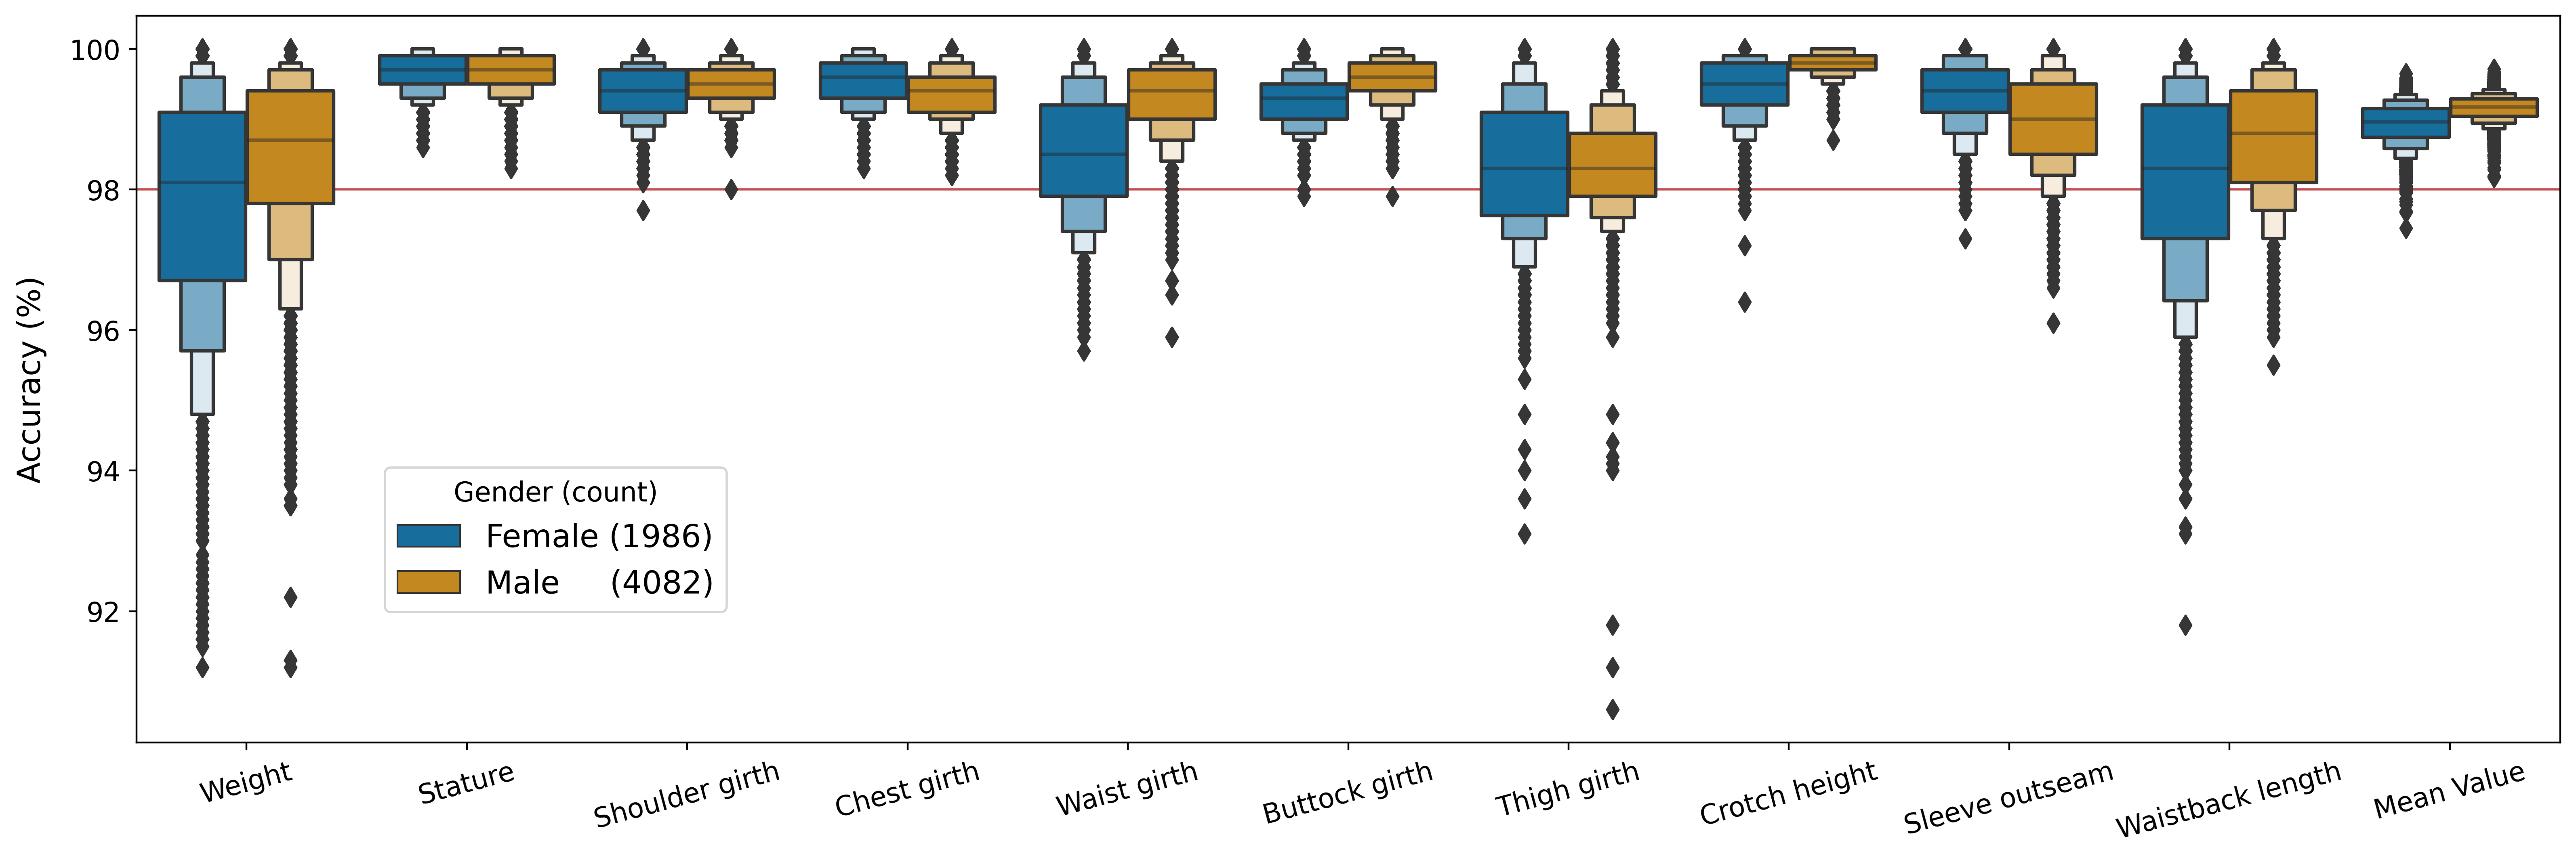

In [ ]:
threshold = 98.0  # set the threshold value

# flierprops = dict(markerfacecolor='0.75', markersize=5,
#               linestyle='none')

sns.set(font_scale=1.0)
plt.style.use("default")

fig, ax = plt.subplots(figsize=(20,6), dpi=400)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)

df_soha_fem = df_error2023_female[SOHA_MEAS].apply(lambda x: 100 - x)
df_soha_fem.columns = SOHA_MEAS_LABELS
fem_tot = len(df_soha_fem)
df_soha_fem['gender'] = f'Female ({fem_tot})'
df_soha_mal = df_error2023_male[SOHA_MEAS].apply(lambda x: 100 - x)
df_soha_mal.columns = SOHA_MEAS_LABELS
mal_tot = len(df_soha_mal)
df_soha_mal['gender'] = f'Male     ({mal_tot})'

df_soha = pd.concat([df_soha_fem, df_soha_mal])
df_soha ['Mean Value'] = df_soha .iloc[:, :-1].mean(axis=1)  # all columns but gender

df_soha_long = pd.melt(df_soha, id_vars=['gender'], value_vars=SOHA_MEAS_LABELS + ['Mean Value'], var_name='Col', value_name='Value')

# Add a horizontal line at y=98 and send it to the background
plt.axhline(y=threshold, color='r', linestyle='-', lw=1.0, zorder=1)

# palette= ['#55A1E8', '#B2F6F0']
palette = sns.color_palette("colorblind")    #"bright"

##########################################################
sns.boxenplot(data=df_soha_long, x='Col', y='Value', hue='gender',
              palette=palette,
              ###k_depth{“tukey”, “proportion”, “trustworthy”, “full”} or scalar
              k_depth=3,
            #   flier_kws=flierprops,
            #   scale='area',
            #   outlier_prop=0.1,
            #   width=0.6,
              )
##########################################################
plt.xlabel("")

plt.ylabel("Accuracy (%)",fontsize=14)
ax.yaxis.labelpad = 10

# Add a legend to the plot
legend = plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.4),fontsize=14)
# Add a title to the legend
legend.set_title("Gender (count)",  prop=FontProperties(size=12))

# increase tick label font size
plt.xticks(fontsize=12, rotation=15)
plt.yticks(fontsize=12)

plt.savefig(f'{DATA_DIR}/avatar-accuracy-paper-boxenplot.eps', format='eps',  bbox_inches='tight')   #, dpi=400
# plt.savefig(f'{DATA_DIR}/avatar-accuracy-paper-{color}.eps', format='eps',  bbox_inches='tight')   #, dpi=400

plt.show()

## Test - fractions

In [ ]:
df_soha_long

,gender,Col,Value
0,Female (1986),Weight,99.20
1,Female (1986),Weight,96.90
2,Female (1986),Weight,99.50
3,Female (1986),Weight,99.90
4,Female (1986),Weight,93.50
...,...,...,...
66743,Male (4082),Mean Value,99.08
66744,Male (4082),Mean Value,99.10
66745,Male (4082),Mean Value,99.02
66746,Male (4082),Mean Value,98.83


In [ ]:
df_soha_long

,gender,Col,Value
0,Female (1986),Weight,99.20
1,Female (1986),Weight,96.90
2,Female (1986),Weight,99.50
3,Female (1986),Weight,99.90
4,Female (1986),Weight,93.50
...,...,...,...
66743,Male (4082),Mean Value,99.08
66744,Male (4082),Mean Value,99.10
66745,Male (4082),Mean Value,99.02
66746,Male (4082),Mean Value,98.83


In [ ]:
df_soha_fem_th = df_soha_fem[SOHA_MEAS_LABELS].apply(lambda x: x >= threshold)
df_soha_mal_th = df_soha_mal[SOHA_MEAS_LABELS].apply(lambda x: x >= threshold)

In [ ]:
frac_female_list = list()

for col in df_soha_fem_th.columns:
    trues = sum(df_soha_fem_th[col] == True)
    falses = sum(df_soha_fem_th[col] == False)
    print(trues, falses, trues + falses)
    frac_female_list.append(trues / df_soha_fem_th.shape[0] * 100)

print(frac_female_list)

1028 958 1986
1986 0 1986
1985 1 1986
1986 0 1986
1417 569 1986
1985 1 1986
1297 689 1986
1977 9 1986
1977 9 1986
1168 818 1986
[51.76233635448136, 100.0, 99.9496475327291, 100.0, 71.34944612286002, 99.9496475327291, 65.30715005035248, 99.54682779456193, 99.54682779456193, 58.81168177240684]


In [ ]:
threshold = 98  # set the threshold value
values = df_soha_long['Value']  # select the values to compare against the threshold
above_threshold = sum(values > threshold)  # count the number of values above the threshold
fraction = above_threshold / len(values)  # calculate the fraction of values above the threshold

print("Fraction of values above threshold: {:.2f}".format(fraction))

Fraction of values above threshold: 0.89


In [ ]:
pd.concat([df_soha_fem, df_soha_mal])

,Weight,Stature,Shoulder girth,Chest girth,Waist girth,Buttock girth,Thigh girth,Crotch height,Sleeve outseam,Waistback length,gender
0,99.2,99.4,98.9,99.8,98.2,99.1,98.4,99.8,99.9,99.7,Female (1986)
1,96.9,99.9,99.0,99.5,99.7,99.8,98.6,99.8,99.9,99.5,Female (1986)
2,99.5,99.5,99.2,99.1,99.1,99.4,99.7,99.2,99.4,97.7,Female (1986)
3,99.9,99.6,99.5,99.7,98.1,100.0,96.5,99.8,99.2,99.1,Female (1986)
4,93.5,99.9,99.8,99.4,96.8,98.2,95.7,99.7,98.4,97.2,Female (1986)
...,...,...,...,...,...,...,...,...,...,...,...
4077,98.1,99.5,99.5,99.5,99.4,99.8,97.7,99.9,98.3,99.1,Male (4082)
4078,98.9,99.5,99.2,99.2,98.9,99.8,97.7,99.6,99.3,98.9,Male (4082)
4079,98.3,99.6,99.1,99.7,99.0,98.9,98.2,99.7,99.8,97.9,Male (4082)
4080,94.3,99.8,99.2,98.9,99.7,99.7,98.8,100.0,99.0,98.9,Male (4082)
